# Decision Tree

---------------------------------------------------------------------------------------------------------------------
### The definition of Decision Tree
Decision tree is a tool for classification and prediction. It is a tree structure flow that each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node noted as a class label. There are different algorithms to constructure decision tree such as ID3, C4.5, C5.0, CART (Classification and Regression Trees)

### Algorithm
 Decision Tree is to divide the data into smaller datasets based on a certain feature value until the target variables all fall under one category.


### Advantages
* Decision trees are able to generate understandable rules.
* Decision trees perform classification without requiring much computation.
* Decision trees are able to handle both continuous and categorical variables.
* Decision trees provide a clear indication of which fields are most important for prediction or classification.

### Disadvantage
* Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
* Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.
* Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.

### Application
* Identiry customer segmentation
* Classification problems
---------------------------------------------------------------------------------------------------------------------
### Reference
* https://en.wikipedia.org/wiki/ID3_algorithm
* https://www.geeksforgeeks.org/decision-tree/
* https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/
---------------------------------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
'''
    Describe dataframe info
'''

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


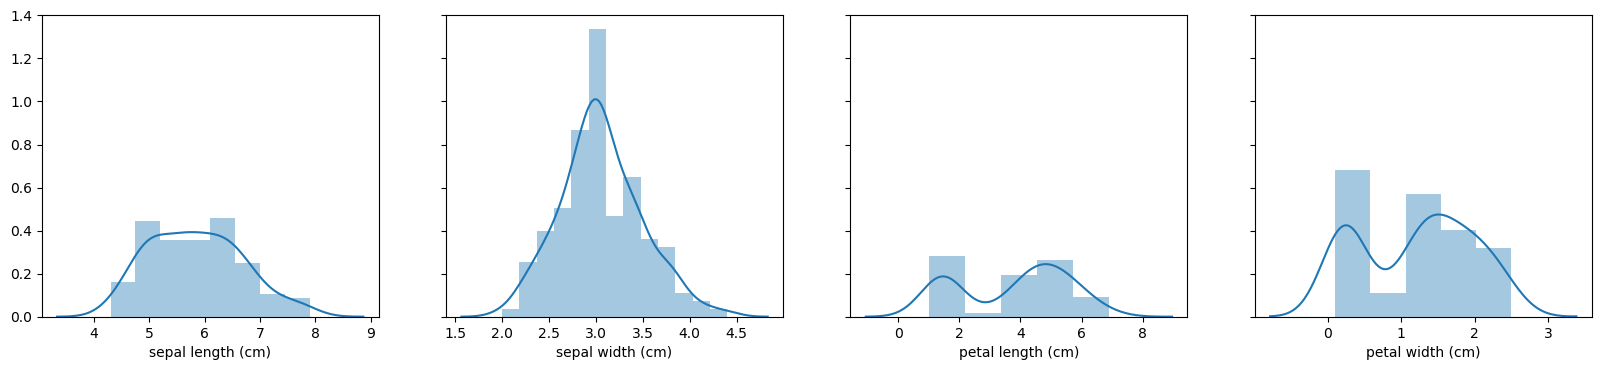

In [4]:
'''
    Grab the distribution of each columns
'''

columns_num = len(iris['feature_names'])

fig, axes = plt.subplots(1, columns_num, figsize=(20, columns_num), sharey=True, dpi=100)
for i in range(columns_num):
    sns.distplot(iris_df[iris_df.columns[i]], ax=axes[i], axlabel=iris_df.columns[i])

In [5]:
'''
    Separate the x and y 
'''

train, test = train_test_split(iris_df, test_size = 0.2)
# Separate train_x train_y and test_x and test_y
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, [-1]]

test_x = test.iloc[:, :-1]
test_y = test.iloc[:, [-1]]

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue 

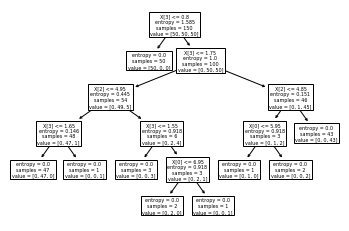

In [6]:
# Default criteria will be Gini index, here is setted to entroyp
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(train_x.to_numpy(), train_y.to_numpy())
tree.plot_tree(clf.fit(iris.data, iris.target)) 

In [7]:
pred_y = clf.predict(test_x)

result_df = pd.DataFrame({'Actual': test_y.iloc[:, 0], 'Predicted': pred_y})
print(result_df)
print("Accuracy: ", sum(test_y.iloc[:, 0] == prediction)/(prediction.size))

     Actual  Predicted
103     2.0          2
96      1.0          1
4       0.0          0
137     2.0          2
109     2.0          2
30      0.0          0
79      1.0          1
121     2.0          2
132     2.0          2
108     2.0          2
39      0.0          0
7       0.0          0
143     2.0          2
51      1.0          1
0       0.0          0
70      1.0          1
148     2.0          2
72      1.0          1
80      1.0          1
97      1.0          1
12      0.0          0
110     2.0          2
57      1.0          1
40      0.0          0
92      1.0          1
90      1.0          1
74      1.0          1
65      1.0          1
69      1.0          1
112     2.0          2


NameError: name 'prediction' is not defined